In [40]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
from load_functions import *
from transform_functions import *
from score_functions import *

In [4]:
test_users = pd.read_csv('test_users.csv', dtype=str, names=['user_id'])
users_df = load_users('users.csv', test_users)
orgs_df = load_orgs('organisations.csv')

In [89]:
test_users = users_df[users_df.in_test==1][['user_id','city']]

In [24]:
user_enc=index_items(users_df['user_id'])

array(['10000013865364765196', '10000021027182109550',
       '10000023838421587579', ..., '9999963113922399126',
       '9999984031519089997', '9999997562571912964'], dtype=object)

In [5]:
aspects = load_aspects()
rubrics = load_rubrics(orgs_df=orgs_df)
features = load_features(orgs_df=orgs_df)

In [7]:
reviews, user_agg, org_agg = load_reviews(users_df=users_df, orgs_df=orgs_df)
orgs_df = orgs_df.merge(org_agg, on='org_id')
users_df = users_df.merge(user_agg, on='user_id')

In [63]:
orgs_df[(orgs_df.city=='spb')&(orgs_df.mean_score>4.8)].sort_values(by='n_reviews', ascending=False)[:10]['org_id'].to_numpy()

array(['5002407858008059043', '17130159649915447104',
       '4975773678370356068', '15803299563419086635',
       '17804839967267310092', '14161975623523399774',
       '17128980968182616934', '17769258395454611746',
       '13038192502461726418', '10607800212635395619'], dtype=object)

In [109]:
test_users = select_test_split(reviews, users_df)
preds = top_recs(orgs_df, test_users)

In [108]:
final_pred = top_recs(orgs_df, test_users)
save_predictions(final_pred)

In [8]:
display(orgs_df.describe())
# fig, axs = plt.subplots(nrows=6 ,figsize = (25,16))
# sns.ecdfplot(data=orgs_df, x='average_bill',ax=axs[0])
# sns.histplot(data=orgs_df, x='rating', ax=axs[1])
# sns.histplot(data=orgs_df, x='rubrics_l', ax=axs[2], hue='city', stat='percent', bins=40)
# sns.histplot(data=orgs_df, x='features_l', ax=axs[3], hue='city', stat='percent',bins=40)
# sns.histplot(data=orgs_df, x='n_reviews', ax=axs[4], hue='city', stat='percent',bins=40)
# sns.histplot(data=orgs_df, x='n_travels', ax=axs[5], hue='city', stat='percent',bins=40)

,average_bill,rating,rubrics_l,features_l,n_reviews,mean_score,mean_aspects,n_travels
count,66405.000000,53257.000000,66405.000000,66405.000000,66405.000000,66405.000000,66405.000000,66405.000000
mean,387.796100,4.126775,1.452361,5.809035,54.827724,4.144561,0.218217,2.575770
std,607.360488,0.699122,0.668355,5.367545,399.265732,0.878407,0.360582,39.556343
min,-1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,-1.000000,3.868421,1.000000,1.000000,2.000000,3.876033,0.000000,0.000000
50%,-1.000000,4.255814,1.000000,5.000000,8.000000,4.333333,0.000000,0.000000
75%,500.000000,4.556474,2.000000,9.000000,31.000000,4.764706,0.368932,1.000000
max,10000.000000,5.000000,6.000000,33.000000,55931.000000,5.000000,7.000000,8679.000000


In [19]:
orgs_df[orgs_df.n_travels>1000]

,org_id,city,average_bill,rating,rubrics_id,features_id,rubrics_l,features_l,n_reviews,mean_score,mean_aspects,n_travels
13349,5002407858008059043,spb,500.0,4.894946,[30776],"[11704, 20422, 3491465406, 3501618484]",1,4,5080,4.892717,0.000000,2218
13638,12784724396885152442,spb,3500.0,4.567690,[30776],"[246, 1018, 1509, 11177, 11617, 11629, 11704, ...",1,14,1964,4.571283,0.387984,1040
16392,14814427257061788801,spb,-1.0,4.443057,[31350],"[11704, 20422, 3491142672, 3501618484, 3501773...",1,6,13228,4.371560,0.003553,2050
31670,12046097390037935713,spb,-1.0,4.518920,[30776],"[601, 11012, 11704, 20422, 3491142672, 3501618...",1,7,49605,4.456144,0.003850,8679
33679,2070377783033138991,spb,500.0,4.676875,"[31350, 30774]","[246, 1018, 11177, 11617, 11629, 11704, 11867,...",2,10,3092,4.682730,0.351552,1230
58227,6838233943148091808,spb,1000.0,4.501816,[30774],"[1018, 11177, 11617, 11629, 11704, 11867, 2042...",1,12,1136,4.518486,0.000000,1126


<AxesSubplot:xlabel='rating', ylabel='mean_score'>

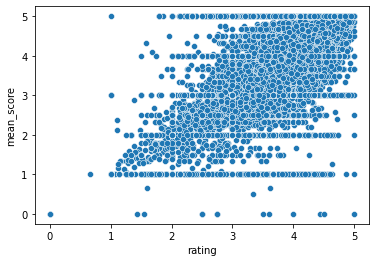

In [21]:
sns.scatterplot(data=orgs_df, x='rating',y='mean_score')

In [ ]:
g = sns.FacetGrid(orgs_df, col="city",height=10, aspect=.7)
g.map(sns.scatterplot, "average_bill","rating")

In [ ]:
fig, axs = plt.subplots(nrows=3 ,figsize = (15,16))
sns.ecdfplot(data=review_stats[review_stats.n_ratings<10], x='n_ratings', stat='proportion', ax=axs[0])
sns.histplot(data=review_stats, x='mean_rating', stat='proportion', ax=axs[1], bins=6)
sns.ecdfplot(data=review_stats[review_stats.mean_aspects<4], x='mean_aspects', stat='proportion', ax=axs[2])

In [ ]:
fig, axs = plt.subplots(nrows=2 ,figsize = (15,16))
sns.histplot(data=reviews, x='in_test', stat='percent', ax=axs[0])
sns.histplot(data=reviews, x='travel', stat='percent', ax=axs[1])

In [ ]:
sns.histplot(count_stat, x='rating', bins=[1,2,3,5,10,50], stat='percent')

5000